<a href="https://colab.research.google.com/github/basilhayek/notebooks/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# This advice comes from https://github.com/pygobject/pycairo/issues/39#issuecomment-391830334
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
libgif-dev set to manually installed.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpixman-1-dev amd64 0.34.0-2 [244 kB]
Get:3 http://archive.ubuntu.com/ubuntu bio

In [6]:
import cairo
from google.colab import files
from IPython.display import SVG, display, Image

In [10]:
def show_svg(file):
    display(SVG(filename=file))

# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook/35061341#35061341
def show_png(file):
    display(Image(filename=file))

In [20]:
class WeatherPlot():
    def __init__(self):
        WIDTH, HEIGHT = 480, 480
        
        self._surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)

        ctx = cairo.Context(self._surface)
        ctx.scale(WIDTH, HEIGHT)  # Normalizing the canvas

        ctx.set_source_rgb(1, 1, 1)
        ctx.rectangle(0,0, 1, 1)
        ctx.fill()
        self._ctx = ctx
        self._num_hours = None
        self._int_width = None

    def _set_intervals(self, hours):
        self._num_hours = len(hours)
        self._int_width = 1 / self._num_hours

    def _isvalid(self, weather_list):
        if weather_list is None:
            return False
        elif isinstance(weather_list, tuple):
            for x in weather_list:
                if not self._isvalid(x):
                    return False
            return True
        elif not isinstance(weather_list, list):
            return False
        elif len(weather_list) != self._num_hours:
            return False
        else:
            return True


    def _scaled_list(self, l, scale_min=None, scale_max=None):
        if scale_min is None:
            scale_min = min(l)
        if scale_max is None:
            scale_max = max(l)

        s = [x - scale_min for x in l]
        s = [x / (scale_max - scale_min) for x in s]
        return s

    def _add_precip(self, precip_pct, precip_acc):
        scaled_acc = self._scaled_list(precip_acc)
        
        ctx = self._ctx
        for idx, pct in enumerate(precip_pct):
            x0 = idx * self._int_width
            y0 = 1 - pct
            acc = scaled_acc[idx]

            pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
            # First stop: lighter if lower accumulation, blue = 100%
            pat.add_color_stop_rgba(y0, 1 - acc, 1 - acc, 1, 1)
            # Last stop: RGB = 0.8, 0.8, 100
            pat.add_color_stop_rgba(1, 0.8, 0.8, 1, 1) 
        
            ctx.rectangle(x0, y0, self._int_width, 1)  # Rectangle(x0, y0, x1, y1)
            ctx.set_source(pat)
            ctx.fill()    


    def _add_temps(self, temps):
        pass



    def draw_weather(self, hours, temps=None, precip_pct=None, precip_acc=None):
        self._set_intervals(hours)

        if self._isvalid(temps):
            self._add_temps(ctx, temps)
        if self._isvalid((precip_pct, precip_acc)): 
            self._add_precip(precip_pct, precip_acc)

        self._surface.write_to_png("weather.png")
        show_png("weather.png")

    



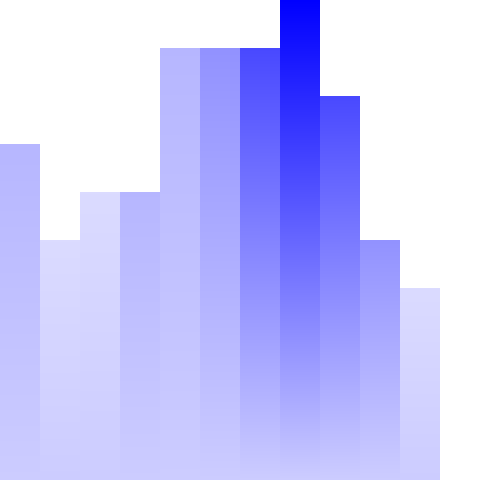

In [21]:
wp = WeatherPlot()
rain_pct = [0.7, 0.5, 0.6, 0.6, 0.9, 0.9, 0.9, 1, 0.8, 0.5, 0.4, 0]
rain_acc = [0.02, 0.01, 0.01, 0.02, 0.02, 0.03, 0.05, 0.07, 0.05, 0.03, 0.01, 0]

wp.draw_weather([1,2,3,4,5,6,7,8,9,10,11,12], None, rain_pct, rain_acc)